# Основные концепции Machine Learning

## Цели работы

1. **Понимание и применение основных концепций машинного обучения:**
   - Изучение ключевых теоретических основ машинного обучения, включая типы обучения, основные алгоритмы и подходы.
   
2. **Реализация и анализ модели регрессии:**
   - Практическое применение теоретических знаний на примере задачи регрессии, включая подготовку данных, выбор подходящей модели, обучение модели и оценку ее эффективности.
   
3. **Разработка и оценка модели классификации:**
   - Построение модели классификации, начиная от предобработки данных до обучения модели и анализа ее результатов, с целью получения глубокого понимания процесса построения и валидации моделей машинного обучения.

Цели работы направлены на углубление понимания машинного обучения через теоретическое осмысление и практическое применение его основных концепций, а также на развитие навыков построения, обучения и оценки моделей для различных типов задач машинного обучения.


## Этап 1. Импорт библиотек и загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [2]:
phones = pd.read_csv("phones.csv")

In [3]:
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


### Визуализация данных о телефонах

Этот блок кода отвечает за создание визуализации данных о телефонах. График позволяет наглядно оценить распределение цен телефонов в зависимости от их операционной системы.


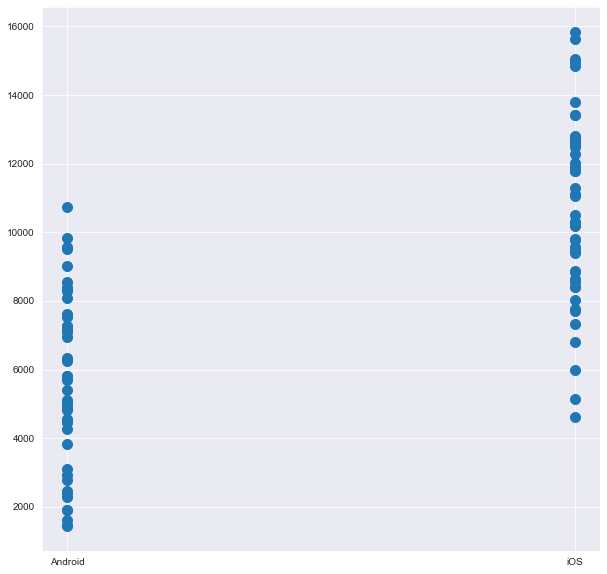

In [4]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["os"], phones["price"], s=100)

# отображаем картинку
plt.show()

### Визуализация зависимости цены от объема памяти телефонов

В этом блоке кода строится визуализация, иллюстрирующая зависимость цены телефонов от их объема встроенной памяти (диска). График отображает, как объем памяти влияет на цену телефона.


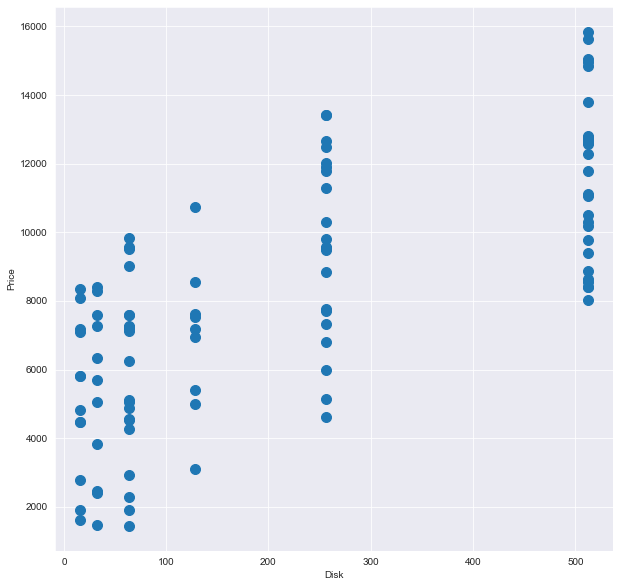

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.xlabel('Disk')
plt.ylabel('Price')
ax.scatter(phones["disk"], phones["price"], s=100)

plt.show()

### Визуализация зависимости цены телефонов от года выпуска

В этой части кода реализована визуализация, демонстрирующая связь между годом выпуска телефонов и их ценами. График отображает тенденции изменения цен на телефоны в зависимости от года их выпуска.


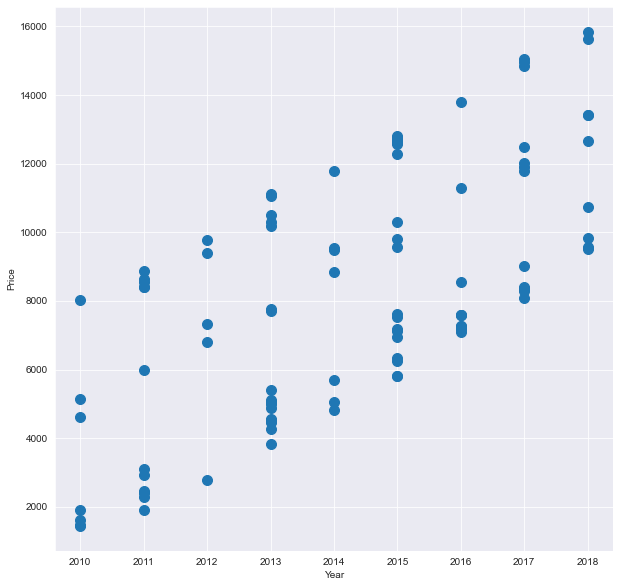

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.xlabel('Year')
plt.ylabel('Price')
ax.scatter(phones["year"], phones["price"], s=100)

plt.show()

## Этап 2. Обучение модели линейной регрессии

Процесс обучения модели линейной регрессии начинается с предобработки данных:

1. **Кодирование категориальных переменных:** Операционная система телефона (`os`) переводится из категориального признака в числовой, используя `LabelEncoder`. Таким образом, каждая операционная система получает свой уникальный идентификатор.

2. **Подготовка данных для обучения:** Данные разделяются на признаки (`X`) и целевую переменную (`y`). Признаки включают 'disk', 'year', и 'os_binary', а целевая переменная — это 'price'.

3. **Обучение модели:** Создается и обучается модель линейной регрессии на подготовленных данных. Модель пытается найти наилучшие коэффициенты (`b1`, `b2`, `b3`) и свободный член (`a`) для уравнения линейной регрессии, которое будет предсказывать цену телефона на основе его характеристик.

4. **Интерпретация результатов:** Полученные коэффициенты и свободный член интерпретируются для понимания взаимосвязей между признаками и целевой переменной.

5. **Предсказание цен:** Создается функция `reg_prediction`, которая использует обученные коэффициенты для предсказания цены телефона на основе его диска, года выпуска и операционной системы.

6. **Сравнение предсказаний:** Сравниваются результаты встроенного метода предсказания `.predict()` и пользовательской функции `reg_prediction`, что позволяет проверить корректность реализованной функции предсказания.

Этот процесс обучения позволяет модели научиться предсказывать цену телефона на основе его характеристик с использованием метода линейной регрессии.


In [7]:
# переводим os в 1 и 0
phones['os_binary'] = LabelEncoder().fit(phones['os']).transform(phones['os'])
phones.head()

,disk,os,price,year,os_binary
0,64,Android,7256,2016,0
1,128,Android,7623,2015,0
2,64,Android,1916,2010,0
3,512,iOS,15045,2017,1
4,16,Android,4478,2013,0


In [8]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[['disk', 'year', 'os_binary']]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [9]:
# вытаскиваем нужные коэффициенты
[b1, b2, b3] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены телефона
def reg_prediction(disk, year, os_binary):
    return a + b1 * disk + b2 * year + b3 * os_binary

In [10]:
# встроенный метод
reg.predict(X[0:1])[0]

7664.436206427403

In [11]:
# наша функция
reg_prediction(X.disk[0], X.year[0], X.os_binary[0])

7664.436206427403

## Этап 3. Обучение модели классификации с использованием дерева решений

Процесс обучения модели классификации заключается в следующих шагах:

1. **Подготовка данных:** Изначально данные разделяются на признаки (`X`) и целевую переменную (`y`). В качестве признаков выбраны 'disk', 'price', и 'year', а целевая переменная — это операционная система телефона ('os').

2. **Создание и обучение классификатора:** Инициализируется классификатор на основе дерева решений (`DecisionTreeClassifier`). Модель обучается на подготовленных данных, стремясь научиться классифицировать телефоны по их операционной системе, основываясь на признаках 'disk', 'price', и 'year'.

3. **Интерпретация построенной модели:** После обучения модели выводится текстовое представление дерева решений с помощью функции `export_text`. Это предоставляет понимание логики, по которой модель принимает решения и как признаки влияют на классификацию.

4. **Классификация и проверка результатов:** Модель используется для классификации новых данных. В примере классификация производится для данных с индексом 3. Предсказанный класс сравнивается с фактическим классом (`y[3]`), что позволяет оценить правильность работы классификатора.

Этот процесс обучения предоставляет полезные инсайты о том, как характеристики телефона, такие как диск, цена и год выпуска, могут влиять на его операционную систему, и обеспечивает возможность предсказывать операционную систему на основе этих признаков.


In [12]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[[ 'disk','price',"year"]]
y = phones['os']
# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [13]:
# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [14]:
# проведем классификацию
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')

## Этап 4. Обучение модели кластеризации с использованием KMeans

Процесс кластеризации данных о телефонах включает несколько ключевых этапов:

1. **Визуализация исходных данных:**
   - Создается визуализация данных о телефонах, где по оси x отложен объем диска, а по оси y — цена. Телефоны с разными операционными системами отмечаются разными маркерами (`o` для Android и `*` для iOS).

2. **Подготовка данных для кластеризации:**
   - Данные о телефонах загружаются в переменную `X`, содержащую информацию о 'disk' и 'price'.

3. **Создание и обучение модели кластеризации:**
   - Инициализируется модель KMeans с указанием количества кластеров (n_clusters=2). Модель обучается на подготовленных данных, стараясь найти оптимальное разделение на кластеры.

4. **Анализ центров кластеров:**
   - Получаются координаты центров кластеров (`clust.cluster_centers_`). Эти центры представляют собой средние значения признаков в каждом кластере.

5. **Визуализация результатов кластеризации:**
   - На графике снова отображаются данные о телефонах с указанием их операционной системы.
   - Добавляется информация о центрах кластеров: они отмечаются крестиками (`x`) и окружены прозрачным кругом, размер которого пропорционален размеру кластера.
   - Это помогает визуально оценить, как алгоритм KMeans сгруппировал данные и где расположены центры этих групп.

Этот процесс позволяет не только классифицировать телефоны на основе их характеристик, но и визуально оценить, как эти характеристики группируются в пространстве признаков, что может быть полезно для дальнейшего анализа данных и принятия решений.


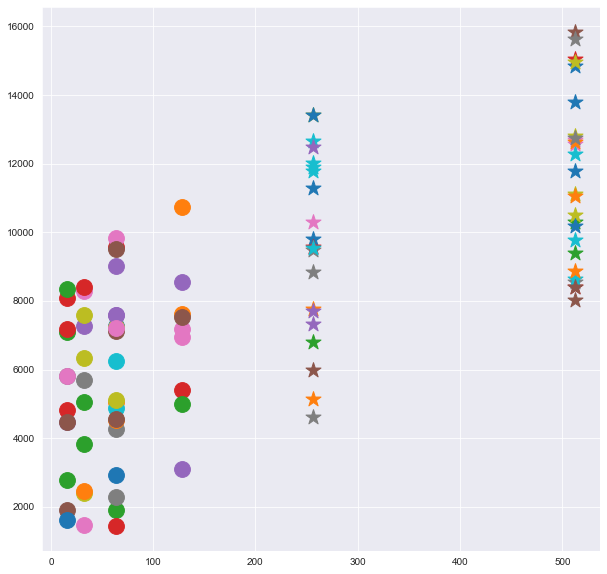

In [15]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "*"}
for d, e, os in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d, e, s=250, marker=markers[os])

# отображаем картинку
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
# выгружаем признаки в отдельную переменную
X = phones[["disk", "price"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=2).fit(X)

/Users/prostolizakotik/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_

In [19]:
clust.cluster_centers_

array([[  371.51219512, 11529.70731707],
       [  110.10169492,  5736.18644068]])

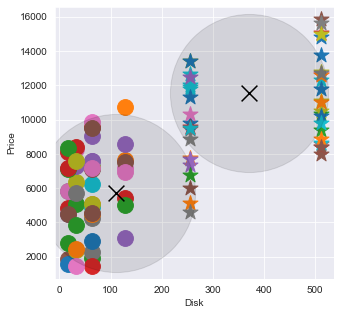

In [25]:
ig = plt.figure(figsize=(5, 5)) # создаем картинку
plt.xlabel('Disk')
plt.ylabel('Price')

markers = {"Android": "o", "iOS": "*"}
for d, e, os in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d, e, s=250, marker=markers[os])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()

## Вывод по работе

В ходе данной работы были успешно достигнуты и реализованы поставленные цели:

1. **Понимание и применение основных концепций машинного обучения:**
   - Были изучены и применены ключевые теоретические основы машинного обучения. Это включало разбор типов обучения, основных алгоритмов и подходов, что позволило закрепить теоретическую базу и лучше понять принципы работы моделей машинного обучения.

2. **Реализация и анализ модели регрессии:**
   - Успешно выполнено практическое задание по обучению модели регрессии. В процессе были рассмотрены этапы подготовки данных, выбора модели, обучения и оценки ее эффективности. Это позволило не только углубить понимание теоретических аспектов регрессии, но и приобрести практический опыт в реализации и оценке регрессионных моделей.

3. **Разработка и оценка модели классификации:**
   - Была разработана и оценена модель классификации. Процесс включал в себя подготовку данных, обучение модели и анализ результатов. Этот этап обеспечил глубокое понимание механизмов построения и валидации моделей классификации и дал возможность на практике применить полученные знания.

Кроме того, был проведен дополнительный анализ с использованием методов кластеризации, что позволило еще лучше изучить структуру и взаимосвязи в данных.

Таким образом, работа способствовала углублению знаний и навыков в области машинного обучения, а также развитию компетенций в реализации, анализе и оценке различных типов моделей машинного обучения. Достижение поставленных целей открывает новые перспективы для дальнейших исследований и проектов в области машинного обучения.
